In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv('diabetes.csv')

In [3]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

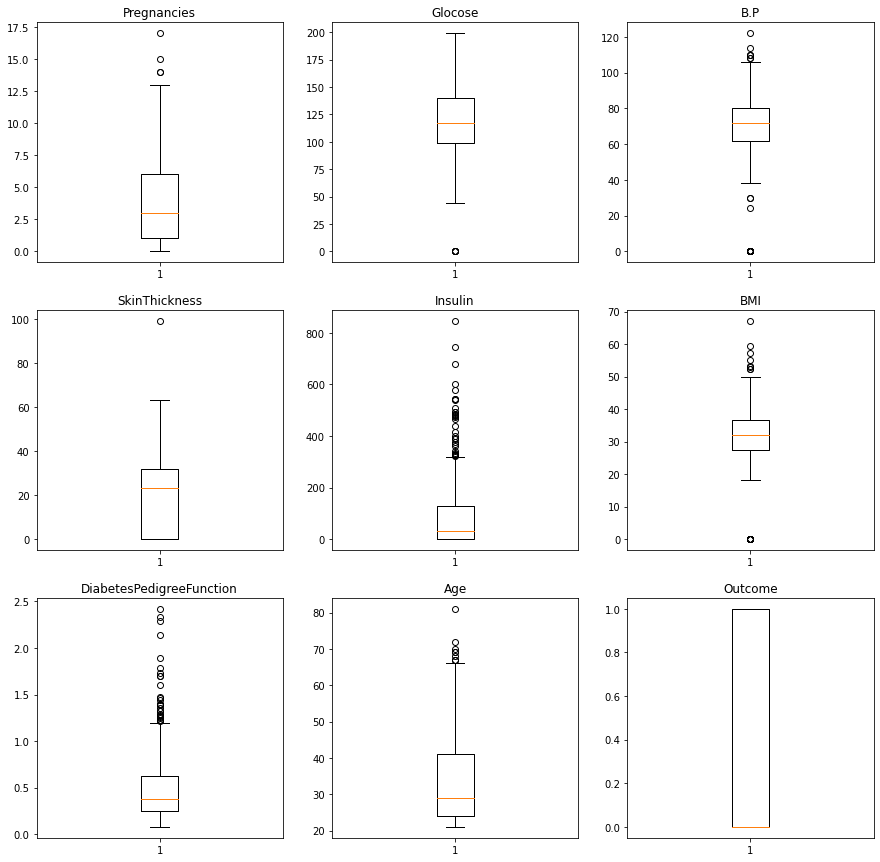

In [7]:
figure, axis = plt.subplots(3, 3,figsize=(15,15))
axis[0, 0].boxplot(d['Pregnancies'])
axis[0, 0].set_title('Pregnancies')
axis[0, 1].boxplot(d['Glucose'])
axis[0, 1].set_title('Glocose')
axis[0, 2].boxplot(d['BloodPressure'])
axis[0, 2].set_title('B.P')
axis[1, 0].boxplot(d['SkinThickness'])
axis[1, 0].set_title('SkinThickness')
axis[1, 1].boxplot(d['Insulin'])
axis[1, 1].set_title('Insulin')
axis[1, 2].boxplot(d['BMI'])
axis[1, 2].set_title('BMI')
axis[2, 0].boxplot(d['DiabetesPedigreeFunction'])
axis[2, 0].set_title('DiabetesPedigreeFunction')
axis[2, 1].boxplot(d['Age'])
axis[2, 1].set_title('Age')
axis[2, 2].boxplot(d['Outcome'])
axis[2, 2].set_title('Outcome')
plt.show()

In [8]:
for column in d:
    if column == 'Pregnancies' or column == 'Outcome':
        continue
    try:
        print(column, ":", d[column].value_counts()[0])
    except KeyError:
        print(column, ":", 0)
#checking the no.of zeros       

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


In [9]:
for column in d:
        if column == 'Pregnancies' or column == 'Outcome':
            continue
        try:
            print(column, ": {}%".format(round((d[column].value_counts()[0] / d[column].value_counts().sum())*100 , 2)))
        except KeyError:
            print(column, ": {}%".format(0))
#checking the percentage of zeros

Glucose : 0.65%
BloodPressure : 4.56%
SkinThickness : 29.56%
Insulin : 48.7%
BMI : 1.43%
DiabetesPedigreeFunction : 0%
Age : 0%


In [10]:
#Removing the rows that contain zero values from Insulin column:
d_copy = d.copy()
d_copy = d[d.Insulin > 0]
d_copy['Glucose'] = d_copy['Glucose'].replace(to_replace = [0], value = [np.median(d_copy.Glucose)])
d_copy['BMI'] = d_copy['BMI'].replace(to_replace = [0], value = [np.median(d_copy.BMI)])
for column in d_copy:
    if column == 'Pregnancies' or column == 'Outcome':
        continue
    try:
        print(column, ":", d_copy[column].value_counts()[0])
    except KeyError:
        print(column, ":", 0)

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

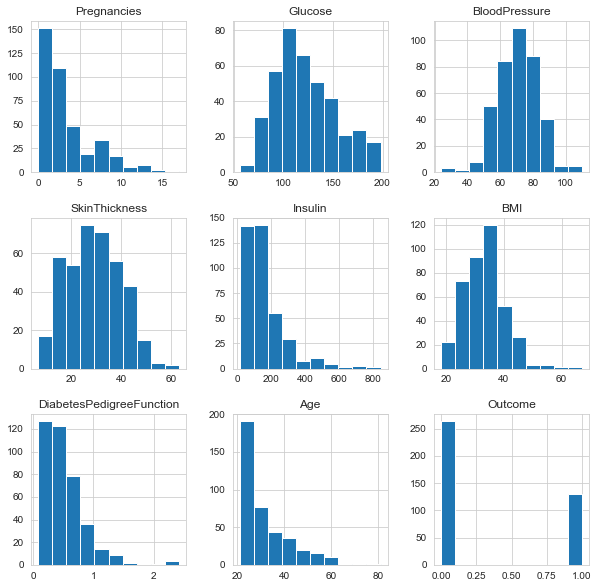

In [81]:
d_copy.hist(figsize = (10,10))#Understanding the distribution of all the features

0    500
1    268
Name: Outcome, dtype: int64


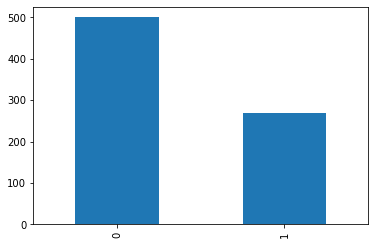

In [12]:
print(d.Outcome.value_counts())
p=d.Outcome.value_counts().plot(kind="bar")
#checking the no.of people having diabetes

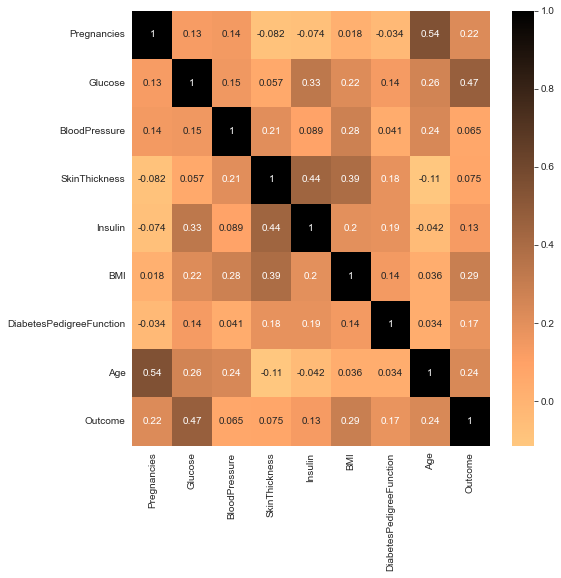

In [84]:
plt.figure(figsize=(8,8))
p=sns.heatmap(d.corr(), annot=True,cmap ='copper_r') 
#corelation among the features, highest is observed between pregnancies and age,Glucose and outcome

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

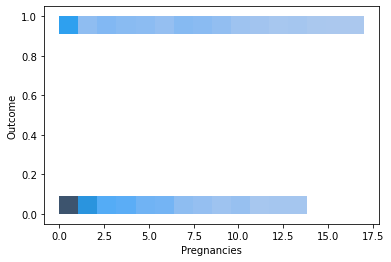

In [15]:
#histogram between no.of pregnancies and the probability of having diabetes
sns.histplot(x="Pregnancies",y="Outcome", data=d)
#There is a considerable 

In [16]:
#Glucose levels and the imapct of it on having diabetes
sns.scatterplot(x="Glucose",y="Outcome",hue="Glucose", data=d_copy)
people having higher glucose levels are most prone to having diabetes

SyntaxError: invalid syntax (2568780818.py, line 3)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

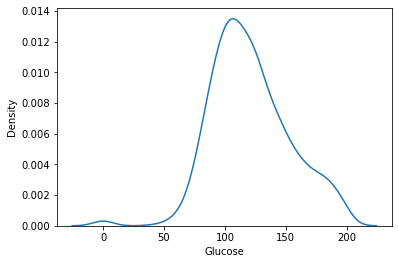

In [17]:
sns.kdeplot(x="Glucose", data=d)

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

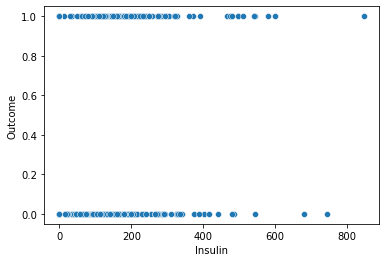

In [18]:
sns.scatterplot(x="Insulin",y="Outcome", data = d)

<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

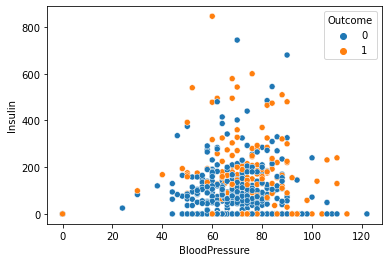

In [19]:
sns.scatterplot(x="BloodPressure",y="Insulin",hue="Outcome", data = d)

<AxesSubplot:xlabel='BloodPressure', ylabel='DiabetesPedigreeFunction'>

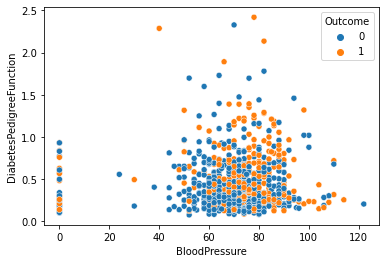

In [20]:
sns.scatterplot(x="BloodPressure",y="DiabetesPedigreeFunction",hue="Outcome", data = d)

<AxesSubplot:xlabel='SkinThickness', ylabel='DiabetesPedigreeFunction'>

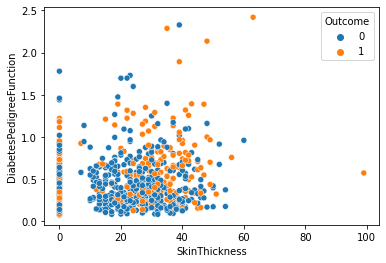

In [21]:
sns.scatterplot(x="SkinThickness",y="DiabetesPedigreeFunction",hue="Outcome", data = d)

<AxesSubplot:xlabel='SkinThickness', ylabel='Age'>

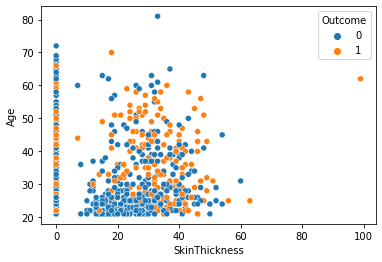

In [22]:
sns.scatterplot(x="SkinThickness",y="Age",hue="Outcome", data = d)

In [23]:
from sklearn.model_selection import train_test_split
#Splitting into dependent and independent attributes:
y = d.Outcome.values
x = d.drop(["Outcome"],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 130)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [25]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
l.fit(x_train, y_train)

LogisticRegression()

In [26]:
pred1 = l.predict(x_test)
pd.DataFrame(np.c_[y_test,pred1],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,1
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
149,1,1
150,0,0
151,1,0
152,0,0


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
l_train = l.score(x_train, y_train)*100
l_test = l.score(x_test, y_test)*100

In [74]:
l_con = confusion_matrix(y_test,pred1)

In [75]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.65      0.57      0.61        49

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



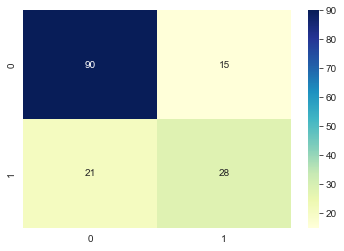

In [76]:
sns.heatmap(l_con, annot=True,cmap="YlGnBu",fmt='g')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [33]:
pred2 = dtree.predict(x_test)
pd.DataFrame(np.c_[y_test,pred2],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
149,1,1
150,0,0
151,1,1
152,0,0


In [66]:
dtree_train = dtree.score(x_train, y_train)*100
dtree_test = dtree.score(x_test, y_test)*100
dtree_con = confusion_matrix(y_test,pred2)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       105
           1       0.59      0.39      0.47        49

    accuracy                           0.72       154
   macro avg       0.67      0.63      0.64       154
weighted avg       0.70      0.72      0.70       154



In [67]:
l_con = confusion_matrix(y_test,pred2)

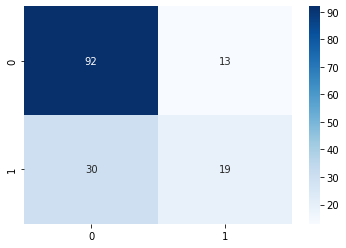

In [68]:
sns.heatmap(l_con, annot=True,cmap="Blues",fmt='g')
plt.show()

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [38]:
pred3 = svm.predict(x_test)
pd.DataFrame(np.c_[y_test,pred3],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,1
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
149,1,1
150,0,0
151,1,0
152,0,0


----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.66      0.59      0.62        49

    accuracy                           0.77       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



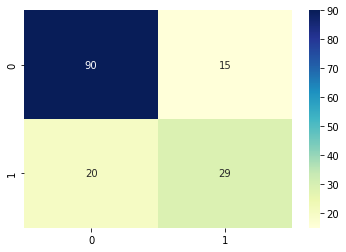

In [41]:
svm_train = svm.score(x_train, y_train)*100
svm_test = svm.score(x_test, y_test)*100
svm_con = confusion_matrix(y_test,pred3)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,pred3))
sns.heatmap(svm_con, annot=True,cmap="YlGnBu",fmt='g')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [44]:
pred4 = rfc.predict(x_test)
pd.DataFrame(np.c_[y_test,pred4],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
149,1,1
150,0,0
151,1,0
152,0,0


In [46]:
rfc_train = rfc.score(x_train, y_train)*100
rfc_test = rfc.score(x_test, y_test)*100
rfc_con = confusion_matrix(y_test,pred4)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.65      0.53      0.58        49

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.75      0.76      0.75       154



<AxesSubplot:>

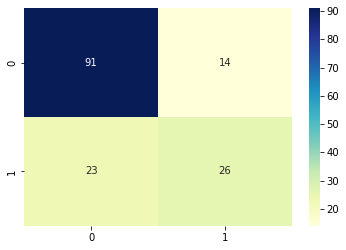

In [48]:
print(classification_report(y_test,pred4))
sns.heatmap(rfc_con, annot=True,cmap="YlGnBu",fmt='g')

In [77]:
MODEL = []
TEST = []
TRAIN = []
def result(model,test,train):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))
result('Logistic Regression', l_test, l_train)
result('Decision Tree Classifier', dtree_test, dtree_train)
result('Support Vector Machine', svm_test, svm_train)
result('Random Forest Classifier', rfc_test, rfc_train)


In [78]:
results = pd.DataFrame({ 'Model': MODEL,
                         'Test Accuracy': TEST,
                         'Train Accuracy': TRAIN })
results

,Model,Test Accuracy,Train Accuracy
0,Logistic Regression,76.62,77.20
1,Decision Tree Classifier,72.08,76.87
2,Support Vector Machine,77.27,77.52
3,Random Forest Classifier,75.97,83.39


In [79]:
results = pd.DataFrame({ 'Model': MODEL,
                         'Test Accuracy': TEST,
                         'Train Accuracy': TRAIN })
results.sort_values(by='Test Accuracy',ascending=False)

,Model,Test Accuracy,Train Accuracy
2,Support Vector Machine,77.27,77.52
0,Logistic Regression,76.62,77.20
3,Random Forest Classifier,75.97,83.39
1,Decision Tree Classifier,72.08,76.87


<AxesSubplot:xlabel='Model', ylabel='Test Accuracy'>

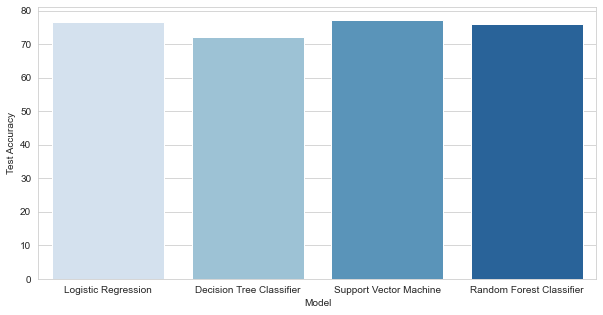

In [80]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x=results['Model'], y=results['Test Accuracy'], palette='Blues')